In [ ]:
# Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sal_data = pd.read_csv('Dataset09-Employee-salary-prediction.csv')
sal_data.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
sal_data.shape

(375, 6)

In [4]:
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [6]:
sal_data.columns = ['Age', 'Gender', 'Degree', 'Job_title', 'Experience_years', 'Salary']
sal_data

,Age,Gender,Degree,Job_title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [7]:
sal_data.dtypes

,0
Age,float64
Gender,object
Degree,object
Job_title,object
Experience_years,float64
Salary,float64


In [9]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job_title         373 non-null    object 
 4   Experience_years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [14]:
sal_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
370,True
371,False
372,True
373,True


In [15]:
sal_data[sal_data.duplicated()].shape

(50, 6)

In [16]:
sal_data1 = sal_data.drop_duplicates(keep='first')
sal_data1

,Age,Gender,Degree,Job_title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


In [17]:
sal_data1.isnull().sum()

,0
Age,1
Gender,1
Degree,1
Job_title,1
Experience_years,1
Salary,1


In [18]:
sal_data1.dropna(how='any', inplace=True)
sal_data1.isnull().sum()

/tmp/ipython-input-2668673687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1.dropna(how='any', inplace=True)


,0
Age,0
Gender,0
Degree,0
Job_title,0
Experience_years,0
Salary,0


In [ ]:
# Data Exploration and visualization

In [19]:
sal_data1.describe()

,Age,Experience_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


<Axes: >

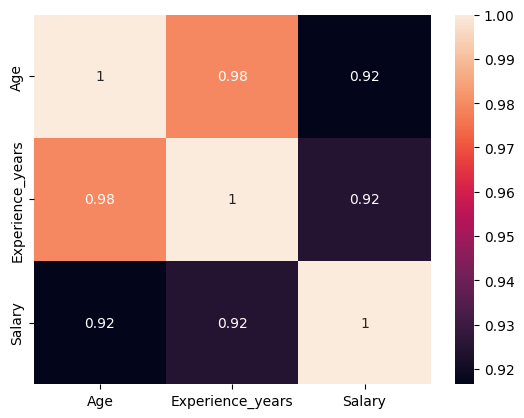

In [21]:
corr = sal_data1[['Age', 'Experience_years', 'Salary']].corr()
sns.heatmap(corr, annot=True)

<Axes: xlabel='Degree'>

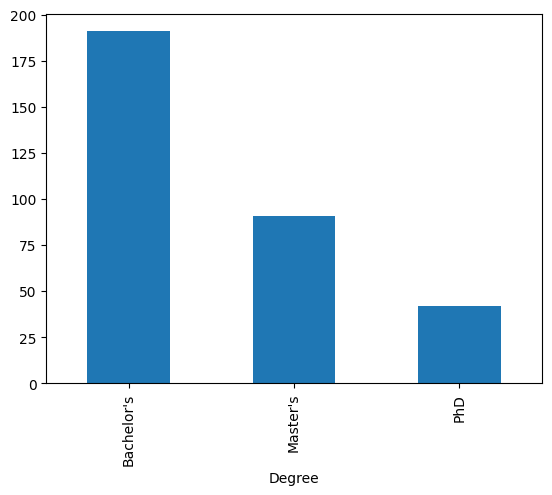

In [22]:
sal_data1['Degree'].value_counts().plot(kind = 'bar')

In [24]:
sal_data1['Job_title'].value_counts()

,count
Job_title,
Director of Operations,9
Director of Marketing,8
Senior Marketing Manager,8
Senior Project Manager,7
Senior Data Scientist,6
...,...
Junior Social Media Specialist,1
Junior Operations Coordinator,1
Senior HR Specialist,1


<Axes: xlabel='Gender'>

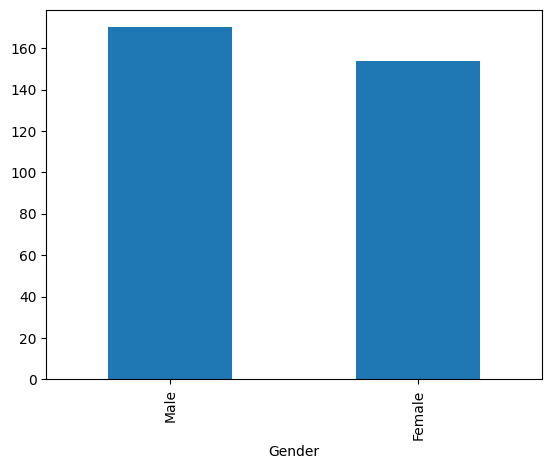

In [25]:
sal_data1['Gender'].value_counts().plot(kind = 'bar')

<Axes: ylabel='Frequency'>

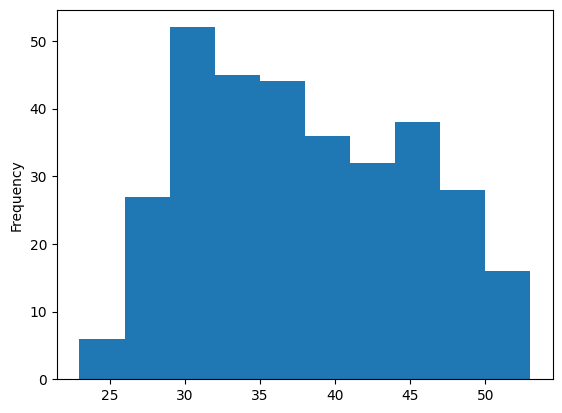

In [26]:
sal_data1['Age'].plot(kind = 'hist')

<Axes: >

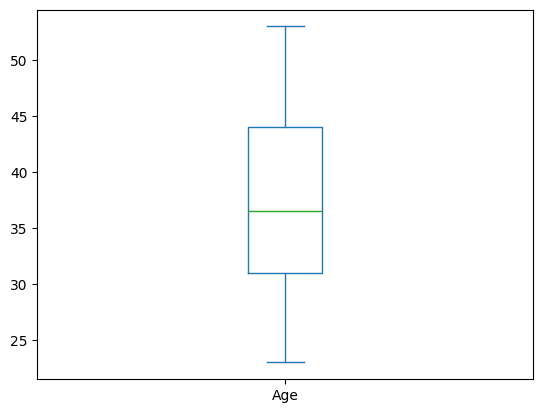

In [27]:
sal_data1.Age.plot(kind = 'box')

<Axes: ylabel='Frequency'>

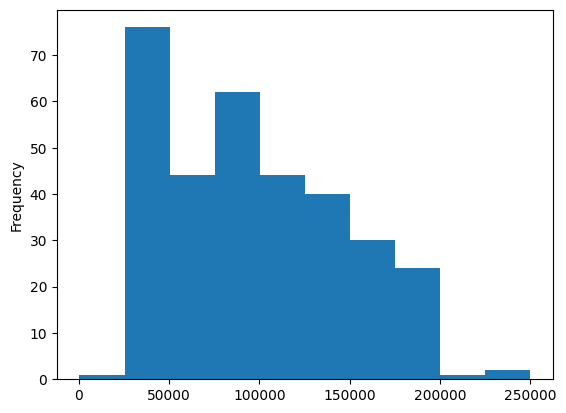

In [31]:
sal_data1.Salary.plot(kind = 'hist')

In [ ]:
# Feature Engineering

In [33]:
from sklearn.preprocessing import LabelEncoder
lebel = LabelEncoder()

sal_data1['Gender'] = lebel.fit_transform(sal_data1['Gender'])
sal_data1['Degree'] = lebel.fit_transform(sal_data1['Degree'])
sal_data1['Job_title'] = lebel.fit_transform(sal_data1['Job_title'])


/tmp/ipython-input-1122948285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Gender'] = lebel.fit_transform(sal_data1['Gender'])
/tmp/ipython-input-1122948285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Degree'] = lebel.fit_transform(sal_data1['Degree'])
/tmp/ipython-input-1122948285.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [34]:
# Data after Label Encoding

In [35]:
sal_data1

,Age,Gender,Degree,Job_title,Experience_years,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,0,0,68,1.0,35000.0
349,36.0,1,0,111,8.0,110000.0
350,44.0,0,2,115,16.0,160000.0
351,31.0,1,0,63,3.0,55000.0


In [ ]:
# Feature scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
sal_data1['Age'] = scaler.fit_transform(sal_data1[['Age']])
sal_data1['Experience_years'] = scaler.fit_transform(sal_data1[['Experience_years']])

/tmp/ipython-input-1795677069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Age'] = scaler.fit_transform(sal_data1[['Age']])
/tmp/ipython-input-1795677069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Experience_years'] = scaler.fit_transform(sal_data1[['Experience_years']])


In [40]:
# Data after scaling
sal_data1

,Age,Gender,Degree,Job_title,Experience_years,Salary
0,-0.750231,1,0,159,-0.761821,90000.0
1,-1.307742,0,1,17,-1.063017,65000.0
2,1.061680,1,2,130,0.744158,150000.0
3,-0.192720,0,0,101,-0.460625,60000.0
4,2.037324,1,1,22,1.497148,200000.0
...,...,...,...,...,...,...
348,-1.307742,0,0,68,-1.364212,35000.0
349,-0.192720,1,0,111,-0.310027,110000.0
350,0.922302,0,2,115,0.894756,160000.0
351,-0.889609,1,0,63,-1.063017,55000.0


In [ ]:
# Dependent and Independent Variable

In [41]:
X = sal_data1[['Age', 'Gender', 'Degree', 'Job_title', 'Experience_years']] #input variabe
y = sal_data1[['Salary']] # Target variable

In [ ]:
# Splitting the data into training and testing

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((259, 5), (65, 5), (259, 1), (65, 1))

In [ ]:
# Model Developement

In [46]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

In [ ]:
# Model Training

In [47]:
linear_reg.fit(X_train, y_train)

LinearRegression()

In [48]:
# Model Prediction

y_pred = linear_reg.predict(X_test)
y_pred

array([[117415.91344602],
       [125562.80742758],
       [ 48965.15386167],
       [128739.34887988],
       [106828.49930535],
       [ 99654.76748821],
       [ 49101.27883652],
       [ 57130.71108104],
       [166333.69009266],
       [ 43112.61060113],
       [ 40544.18249367],
       [122553.217185  ],
       [107631.15450848],
       [155580.48335296],
       [ 83652.23602446],
       [170890.28450907],
       [ 98984.50106226],
       [109338.33008328],
       [ 42267.86835535],
       [ 48089.87647812],
       [ 75674.93528581],
       [ 64499.29874156],
       [ 63619.2494321 ],
       [ 31543.41552147],
       [188376.92844437],
       [ 90340.76921722],
       [155285.91529198],
       [160863.57809872],
       [185183.73163709],
       [ 34741.26224478],
       [124850.6230462 ],
       [165106.94121635],
       [ 87085.00622186],
       [155425.69514031],
       [149190.25441885],
       [ 45729.74800187],
       [ 88475.39474629],
       [ 92025.62668073],
       [ 979

In [56]:
# Actual value and predicted values


In [57]:
print(type(y_test))
print(type(y_pred))

print("y_test shape:", getattr(y_test, "shape", "no shape"))
print("y_pred shape:", getattr(y_pred, "shape", "no shape"))


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
y_test shape: (65, 1)
y_pred shape: (65, 1)


In [58]:
import numpy as np
import pandas as pd

y_test_clean = np.array(y_test).reshape(-1)
y_pred_clean = np.array(y_pred).reshape(-1)

df = pd.DataFrame({
    'y_actual': y_test_clean,
    'y_pred': y_pred_clean
})

df.head()


,y_actual,y_pred
0,100000.0,117415.913446
1,100000.0,125562.807428
2,50000.0,48965.153862
3,110000.0,128739.348880
4,105000.0,106828.499305


In [59]:
df['Error'] = df['y_actual'] - df['y_pred']
df.head()

,y_actual,y_pred,Error
0,100000.0,117415.913446,-17415.913446
1,100000.0,125562.807428,-25562.807428
2,50000.0,48965.153862,1034.846138
3,110000.0,128739.348880,-18739.348880
4,105000.0,106828.499305,-1828.499305


In [60]:
df['abs_error'] = abs(df['Error'])
df

,y_actual,y_pred,Error,abs_error
0,100000.0,117415.913446,-17415.913446,17415.913446
1,100000.0,125562.807428,-25562.807428,25562.807428
2,50000.0,48965.153862,1034.846138,1034.846138
3,110000.0,128739.348880,-18739.348880,18739.348880
4,105000.0,106828.499305,-1828.499305,1828.499305
...,...,...,...,...
60,80000.0,117279.788471,-37279.788471,37279.788471
61,85000.0,83396.821876,1603.178124,1603.178124
62,170000.0,177743.761029,-7743.761029,7743.761029
63,75000.0,72275.144274,2724.855726,2724.855726


In [ ]:
#Model Evaluation

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, r2_score

In [ ]:
# Model Accuracy

In [62]:
r2_score(y_test, y_pred)

0.8911231066517091

In [63]:
print(f'Accuracy of model = {round(r2_score(y_test, y_pred),4)*100}%')

Accuracy of model = 89.11%


In [64]:
#MAE
mean_absolute_error(y_test, y_pred)


10570.786401136163

In [65]:
#MSE
mean_squared_error(y_test, y_pred)

205754135.71726072

In [67]:
#RMSE
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_pred))
root_mean_squared_error

np.float64(14344.13244909781)

In [ ]:
#Customize prediction

In [68]:
Age1 = scaler.transform([[49]])
Age = 5.86448677
Gender = 0
Degree = 2
Job_title = 22
Experience_years1 = scaler.transform([[15]])
Experience_years = 0.74415815
#find salary = ?



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [72]:
Emp_Salary = linear_reg.predict(
    [[Age, Gender, Degree, Job_title, Experience_years]]
)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [75]:
print("Salary of new predicted Employee", Emp_Salary[0])

Salary of new predicted Employee [249925.15061728]
